[*********************100%%**********************]  1 of 1 completed


38/38 [==============================] - 1s 16ms/step
                Close  Predictions
Date                              
2018-04-02  50.631500    51.553085
2018-04-03  50.933998    51.096531
2018-04-04  51.485500    50.735340
2018-04-05  51.632000    50.524654
2018-04-06  50.497501    50.510002


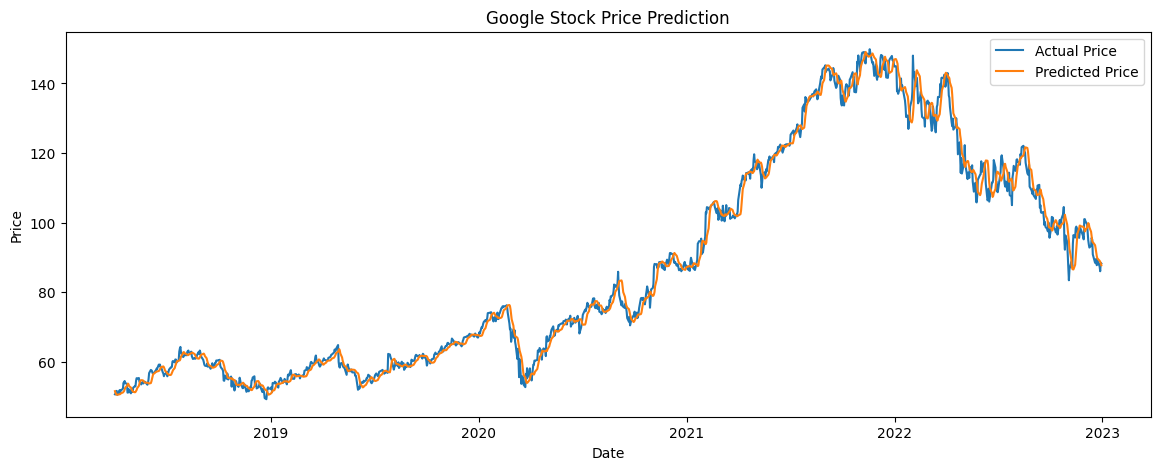

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

# Download Google stock data from Yahoo Finance
ticker = "GOOGL"
data = yf.download(ticker, start="2018-01-01", end="2023-01-01")

# Prepare the data
data = data[['Close']]
data = data.dropna()

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create the dataset
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape the data for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Load the model
model = load_model('LSTM_Best_Model_1.keras')

# Make predictions
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)

# Create a DataFrame to compare the predictions with the actual prices
df = pd.DataFrame(data[time_step + 1:])
df['Predictions'] = predictions

print(df.head())

# Optionally, plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Close'], label='Actual Price')
plt.plot(df.index, df['Predictions'], label='Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


38/38 [==============================] - 1s 16ms/step
                 Close  Predictions
Date                               
2018-04-02  155.389999   157.221588
2018-04-03  156.110001   155.723221
2018-04-04  155.100006   154.735138
2018-04-05  159.339996   154.353149
2018-04-06  157.199997   154.213593


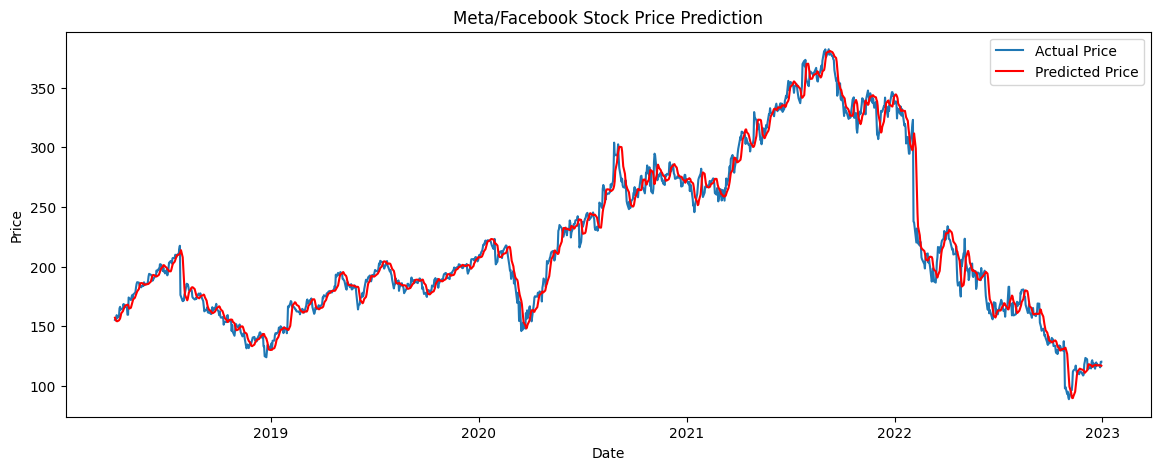

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

# Download Google stock data from Yahoo Finance
ticker = "META"
data = yf.download(ticker, start="2018-01-01", end="2023-01-01")

# Prepare the data
data = data[['Close']]
data = data.dropna()

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create the dataset
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape the data for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Load the model
model = load_model('LSTM_Best_Model_1.keras')

# Make predictions
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)

# Create a DataFrame to compare the predictions with the actual prices
df = pd.DataFrame(data[time_step + 1:])
df['Predictions'] = predictions

print(df.head())

# Optionally, plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Close'], label='Actual Price')
plt.plot(df.index, df['Predictions'], label='Predicted Price', color='red')
plt.title('Meta/Facebook Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
